### 목표
- 선형회귀 이론에 대해 이해해보자
- LinearModel을 사용해보자!

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 데이터 생성
data = pd.DataFrame({'시간': [2,4,8,9], '성적':[20,40,80,90]},
                    index = ['교인','홍철','상석','승철'])
data

,시간,성적
교인,2,20
홍철,4,40
상석,8,80
승철,9,90


### 선형모델을 활용
- 7시간 공부했을때의 성적 예측

In [2]:
# 수학공식을 활용한 해석적 방법 -> mse 를 가지고 찾아가는 방법
# 모델 불러오기
from sklearn.linear_model import LinearRegression

In [3]:
# 모델 객체생성
linear_model = LinearRegression()

In [9]:
# 모델학습
# model.fit(학습용문제, 학습용정답)
# model.fit(시간, 성적)
# 문제 > 2차원, 정답 > 1차원
data[['시간']]
data['성적']
linear_model.fit(data[['시간']],data['성적'])
# 최적의 직선을 그려본것!

LinearRegression()

In [11]:
# 우리가 스스로 예측한 예상 직선 > y = 10x
# 모델이 예측한 직선을 확인 (y = wx + b)
print('가중치(w):', linear_model.coef_)
print('절편(b):', linear_model.intercept_)
# 부동소수점 > 소수점을 앞으로 15번 이동 > 거의 0과 같음
# y = 10 x + 0

가중치(w): [10.]
절편(b): 7.105427357601002e-15


In [12]:
# 모델 예측
# model.predict(테스트용문제) > 문제데이터 2차원
# 7시간 공부했을때 성적은?
linear_model.predict([[7]])

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

##### 경사하강법 그래프 그려보기
- 선형모델의 MSE(평균제곱오차)가 최소가 되는 W,B값을 찾아나가는 방법
- 가중치(w) 변화에 따른 비용함수(cost) 값의 변화그래프 출력
    - 비용함수는 원래의 값과 가장 오차가 작은 함수를 도출하기위해 사용되는 함수

In [13]:
# 가설 함수 설정
def h(w,x):
    return w*x + 0
# 우리가 w 값이 달라질경우 계속해서 다른수로 바꿔주어야한다!

In [14]:
# 비용함수 설정 (MSE)
def cost (data, target, weight):
    # data: 예측할 데이터의 x값, target: 실제답, weight : 가중치
    y_pre = h(weight, data)
    mse = ((y_pre-target)**2).mean()  # (예측값-실제값)
    return mse

In [15]:
# 우리가 예측한 가중치가 10일때 MSE
cost(data['시간'], data['성적'], 10)
# 오차가 0

0.0

In [17]:
# 가중치가 5일때
cost(data['시간'], data['성적'], 5)

1031.25

In [18]:
# 가중치 15
cost(data['시간'], data['성적'], 15)

1031.25

In [19]:
# 가중치 12
cost(data['시간'], data['성적'], 12)

165.0

- w(가중치) 값의 변화에 따른 MSE 변화율 그래프 그리기 > 경사하강법

In [20]:
w_arr = range(-10,31) # -10~30

In [21]:
# 반복문을 사용해서 -10~30 까지의 mse 를 구해서 리스트에 담기
cost_list = []
for w in w_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

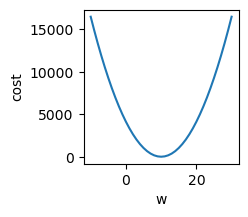

In [24]:
# 그래프 그리기
plt.figure(figsize = (2,2))
plt.plot(w_arr,cost_list) # (x축, y축)
plt.xlabel('w')
plt.ylabel('cost')
plt.show()